In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [38]:
df = pd.read_csv("employee_experience_survey_data (1).csv")

In [39]:
df

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree
5,Sara Ahmed,45-54,Male,Middle Eastern,Business Consultant,Operations,2024-10-09,Disagree,Strongly Disagree,Neutral,Neutral,Agree,Agree,Disagree,Neutral,Agree,Strongly Disagree,Neutral
6,Tom Davis,25-34,Male,Caucasian,UX Designer,HR,2024-10-08,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Agree
7,Linda Lopez,18-24,Male,African American,Customer Support,Product Development,2024-10-10,Disagree,Agree,Neutral,Strongly Disagree,Strongly Disagree,Agree,Neutral,Agree,Disagree,Disagree,Agree
8,Raj Patel,35-44,Female,Indian,Product Manager,IT,2024-10-07,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Strongly Agree,Agree,Agree,Neutral,Agree,Strongly Agree,Disagree
9,Amara Njeri,18-24,Male,African American,HR Specialist,Design,2024-10-10,Strongly Agree,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Disagree,Neutral,Agree,Neutral,Neutral,Strongly Disagree


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Career Development Oppor

In [41]:
df.describe()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
count,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
unique,15,4,2,6,8,8,7,5,5,5,5,5,5,4,5,5,5,5
top,John Doe,18-24,Female,Middle Eastern,UX Designer,Sales,2024-10-07,Disagree,Strongly Agree,Strongly Disagree,Neutral,Neutral,Agree,Neutral,Strongly Disagree,Neutral,Agree,Strongly Agree
freq,1,7,9,4,4,4,4,4,5,5,5,5,6,5,4,6,7,4


In [42]:
# Descriptive Statistics: Summary for 'Overall Engagement' and 'Job Satisfaction'
print("\nDescriptive statistics for Overall Engagement and Job Satisfaction:")
print(df[['Overall Engagement', 'Job Satisfaction']].describe())


Descriptive statistics for Overall Engagement and Job Satisfaction:
       Overall Engagement Job Satisfaction
count                  15               15
unique                  5                5
top        Strongly Agree         Disagree
freq                    4                4


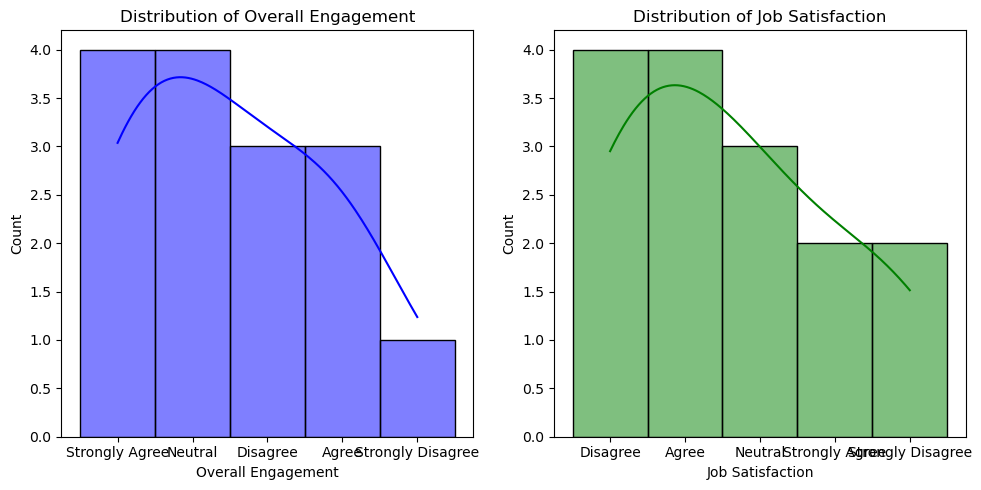

In [43]:
#Visualization: Distribution of Overall Engagement and Job Satisfaction
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Overall Engagement'], bins=10, kde=True, color='blue')
plt.title('Distribution of Overall Engagement')

plt.subplot(1, 2, 2)
sns.histplot(df['Job Satisfaction'], bins=10, kde=True, color='green')
plt.title('Distribution of Job Satisfaction')

plt.tight_layout()
plt.show()

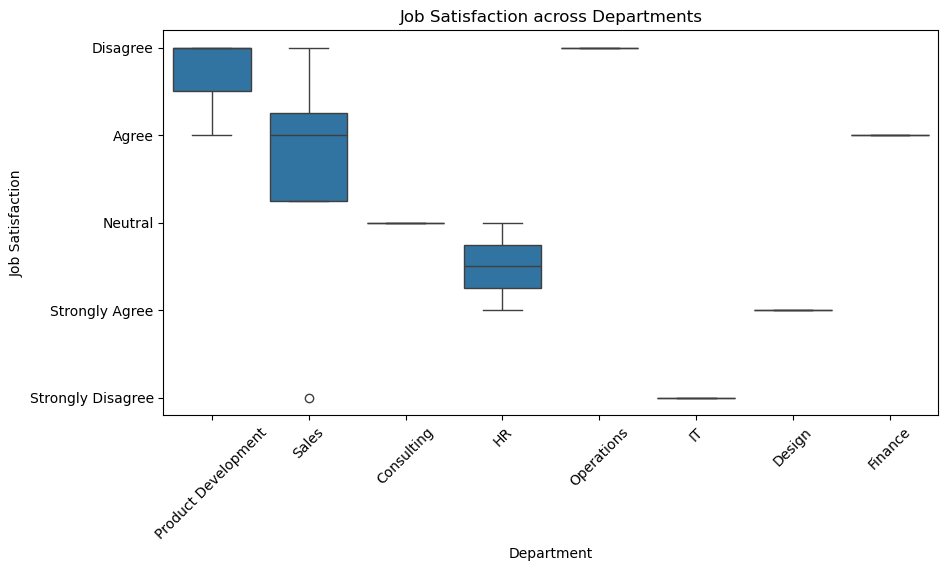

In [44]:
# Analysis of Satisfaction across Departments
plt.figure(figsize=(10,5))
sns.boxplot(x='Department', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction across Departments')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Create a mapping for Likert scale to numeric values
likert_scale_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

In [46]:
# Apply the mapping to the 'Job Satisfaction' column
df['Job Satisfaction'] = df['Job Satisfaction'].map(likert_scale_mapping)

# Ensure no NaN values remain after the conversion
df = df.dropna(subset=['Job Satisfaction'])

# Now perform the t-test between IT and HR departments after conversion
dept1 = df[df['Department'] == 'IT']['Job Satisfaction']
dept2 = df[df['Department'] == 'HR']['Job Satisfaction']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(dept1, dept2)

print("\nT-test results between IT and HR:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-test results between IT and HR:
T-statistic: -1.7320508075688774, P-value: 0.33333333333333326



Number of NaN values in 'Work-Life Balance': 0
Number of NaN values in 'Overall Engagement': 0

Correlation between Work-Life Balance and Overall Engagement: -0.36104082040916596


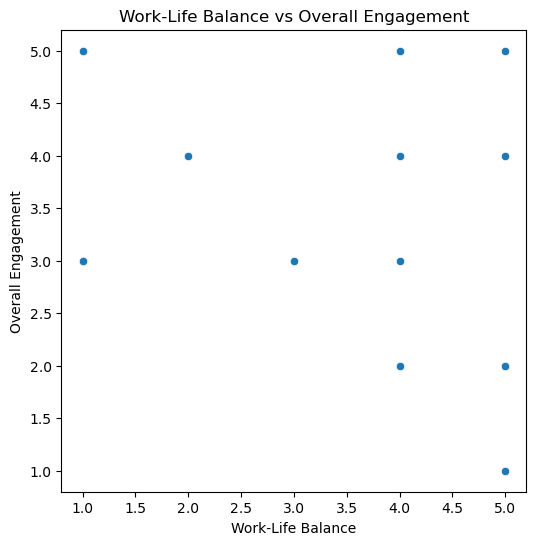

In [47]:
# Create a mapping for Likert scale to numeric values
likert_scale_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}
# Step 3: Apply the mapping to 'Work-Life Balance' and 'Overall Engagement'
df['Work-Life Balance'] = df['Work-Life Balance'].map(likert_scale_mapping)
df['Overall Engagement'] = df['Overall Engagement'].map(likert_scale_mapping)

# Step 4: Check for missing (NaN) values after mapping
print("\nNumber of NaN values in 'Work-Life Balance':", df['Work-Life Balance'].isna().sum())
print("Number of NaN values in 'Overall Engagement':", df['Overall Engagement'].isna().sum())

# Step 5: Drop rows with NaN values in these columns
df = df.dropna(subset=['Work-Life Balance', 'Overall Engagement'])

# Step 6: Calculate the correlation between Work-Life Balance and Overall Engagement
correlation = df['Work-Life Balance'].corr(df['Overall Engagement'])
print(f"\nCorrelation between Work-Life Balance and Overall Engagement: {correlation}")

# Step 7: Visualization of correlation
plt.figure(figsize=(6,6))
sns.scatterplot(x='Work-Life Balance', y='Overall Engagement', data=df)
plt.title('Work-Life Balance vs Overall Engagement')
plt.show()